#### Star: 1
#### Galaxy: 2
#### Quasar: 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
full_data = pd.read_csv('/Users/atg/Desktop/Astronomy hackathon/Other/Code.2/SDSS_all.csv',
                   header=0, sep=',')
data = full_data.drop('redshift', axis=1)

#### Visualisation & Temperture

In [4]:
full_data.head(2)

,u,g,r,i,z,specClass,redshift,zerr
0,18.610222,18.410435,18.455702,18.353773,18.133831,3,0.426671,0.001383
1,20.497831,20.161953,20.239063,20.412947,20.446335,1,-0.000104,0.000475


In [125]:
''' Convert ugriz to UBVRI and return U-B and B-V '''
import ugriz_to_UBVRI as phconv

def stars_perf(ugriz):
    jester = phconv.Jester('star', ugriz)
    karaali = phconv.Karaali('star', ugriz)
    lupton = phconv.Lupton('star', ugriz)
    U_B = B_V = list()

    if jester is not None:
        U_B.append(jester['U_B'])
        B_V.append(jester['B_V'])
        
    if karaali is not None:
        B_V.append(karaali['B_V'])
    
    if lupton is not None:
        B_V.append(lupton['B_V'])

    result = dict()
    result['U_B'] = np.mean(U_B)
    result['B_V'] = np.mean(B_V)
    return result

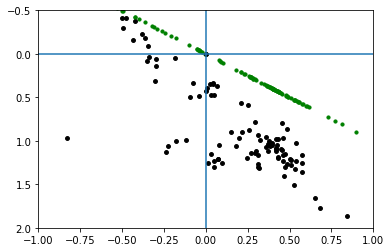

In [126]:
stars = full_data[full_data['specClass']==1]

colums = stars.shape[0]
tempertures = []

for clm in range(colums):
    u = stars['u'].iloc[clm]
    g = stars['g'].iloc[clm]
    r = stars['r'].iloc[clm]
    i = stars['i'].iloc[clm]
    z = stars['z'].iloc[clm]
    ugriz = (u, g, r, i, z)
    result = stars_perf(ugriz)
    U_B = result['U_B']
    B_V = result['B_V']

    T = 4600* ( 1/(0.92*(B_V)+1.7) + 1/(0.92*(B_V)+0.62) )
    
    plt.scatter(U_B, B_V, s=10, c='green')
    plt.scatter(g-r, u-g, s=15, c='black')
    
    tempertures.append(T)
    

plt.xlim(-1, 1)
plt.ylim(-0.5, 2)
plt.ylim(plt.ylim()[::-1])
plt.axvline(x=0)
plt.axhline(y=0)
plt.show()

In [132]:
stars['temperture'] = tempertures